In [112]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import re
import seaborn as sns

In [82]:
BB = pd.read_csv("../data/Hot Stuff.csv")
Genius = pickle.loads(open("../data/pickle/GeniusGithub_reformat.pickle", "rb").read())

### Making the BB dataFrame. Adding the Month ID as Float (Year + (Month-1)/12)

In [83]:
BB_Song = BB.groupby(["Performer", "Song"]).agg({"WeekID": np.min}).reset_index()
BB_Song["WeekID"] = pd.to_datetime(Song["WeekID"])
BB_Song["MonthID"] = [i.year + (i.month - 1)/12 for i in BB_Song["WeekID"]]

In [85]:
BB_Song.head()

,Performer,Song,WeekID,MonthID
0,"""Groove"" Holmes",Misty,1966-06-25,1966.416667
1,"""Groove"" Holmes",What Now My Love,1966-10-01,1966.750000
2,"""Little"" Jimmy Dickens",May The Bird Of Paradise Fly Up Your Nose,1965-10-16,1965.750000
3,"""Pookie"" Hudson",I Know I Know,1963-05-25,1963.333333
4,"""Weird Al"" Yankovic",Amish Paradise,1996-03-30,1996.166667


### Making the Genius Reformatted into a pd Dataframe

In [86]:
list_of_words = lambda ly : " ".join(re.split(r"\[[\s\S]*?\]|[^\w'\\-]|\s",ly.lower())).split()
Genius_Song = pd.DataFrame([(a, s, Genius[a][s]["lyrics"], list_of_words(Genius[a][s]["lyrics"])) for a in Genius.keys() for s in Genius[a].keys()])
Genius_Song.columns = ["Performer", "Song", "Lyrics", "List"]
Genius_Song["Bag"] = [Counter(i) for i in Genius_Song["List"]]

In [91]:
Genius_Song.head()

,Performer,Song,Lyrics,List,Bag
0,"10,000 Maniacs",Few And Far Between,"Times are far between, and few I bet, when we ...","[times, are, far, between, and, few, i, bet, w...","{'times': 1, 'are': 3, 'far': 1, 'between': 1,..."
1,"10,000 Maniacs",Trouble Me,[Chorus:]\nTrouble me\nDisturb me with all you...,"[trouble, me, disturb, me, with, all, your, ca...","{'trouble': 4, 'me': 17, 'disturb': 1, 'with':..."
2,"10,000 Maniacs",More Than This,I could feel at the time\nThere was no way of ...,"[i, could, feel, at, the, time, there, was, no...","{'i': 1, 'could': 1, 'feel': 1, 'at': 1, 'the'..."
3,"10,000 Maniacs",Candy Everybody Wants,"[Intro]\nHey, hey, give 'em what they want\n\n...","[hey, hey, give, 'em, what, they, want, if, lu...","{'hey': 8, 'give': 7, ''em': 7, 'what': 7, 'th..."
4,"10,000 Maniacs",Because The Night,"[Verse 1]\nTake me now, baby, here as I am\nHo...","[take, me, now, baby, here, as, i, am, hold, m...","{'take': 6, 'me': 5, 'now': 12, 'baby': 2, 'he..."


### Merge the two DF

In [99]:
Genius_Song = pd.merge(Genius_Song, BB_Song, left_on = ["Performer", "Song"], right_on = ["Performer", "Song"], how="left").reset_index(drop=True)
Genius_Song.shape

In [101]:
Genius_Song.head()

,Performer,Song,Lyrics,List,Bag,WeekID,MonthID
0,"10,000 Maniacs",Few And Far Between,"Times are far between, and few I bet, when we ...","[times, are, far, between, and, few, i, bet, w...","{'times': 1, 'are': 3, 'far': 1, 'between': 1,...",1993-08-21,1993.583333
1,"10,000 Maniacs",Trouble Me,[Chorus:]\nTrouble me\nDisturb me with all you...,"[trouble, me, disturb, me, with, all, your, ca...","{'trouble': 4, 'me': 17, 'disturb': 1, 'with':...",1989-06-17,1989.416667
2,"10,000 Maniacs",More Than This,I could feel at the time\nThere was no way of ...,"[i, could, feel, at, the, time, there, was, no...","{'i': 1, 'could': 1, 'feel': 1, 'at': 1, 'the'...",1997-10-11,1997.750000
3,"10,000 Maniacs",Candy Everybody Wants,"[Intro]\nHey, hey, give 'em what they want\n\n...","[hey, hey, give, 'em, what, they, want, if, lu...","{'hey': 8, 'give': 7, ''em': 7, 'what': 7, 'th...",1993-03-13,1993.166667
4,"10,000 Maniacs",Because The Night,"[Verse 1]\nTake me now, baby, here as I am\nHo...","[take, me, now, baby, here, as, i, am, hold, m...","{'take': 6, 'me': 5, 'now': 12, 'baby': 2, 'he...",1994-01-01,1994.000000


#### Group by Month

In [114]:
month_count_df = Genius_Song.groupby("MonthID").count()["Song"]

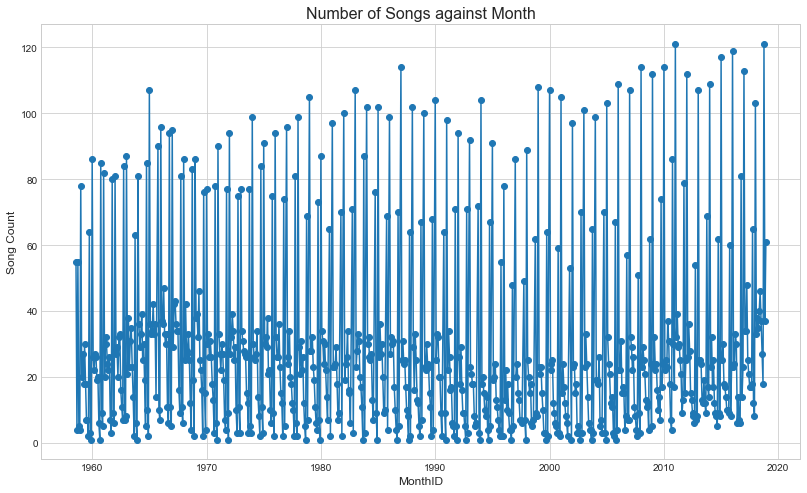

In [133]:
def plot_Count(df, timeGranu):
    plt.figure(figsize = (13.6, 8))
    sns.set_style("whitegrid")
    plt.plot(list(df.index), list(df), "-o")
    plt.xlabel("{}ID".format(timeGranu), fontsize=12)
    plt.ylabel("Song Count", fontsize=12)
    plt.title("Number of Songs against {}".format(timeGranu), fontsize=16)
    plt.show()
plot_Count(month_count_df, "Month")

#### Group by Quarter

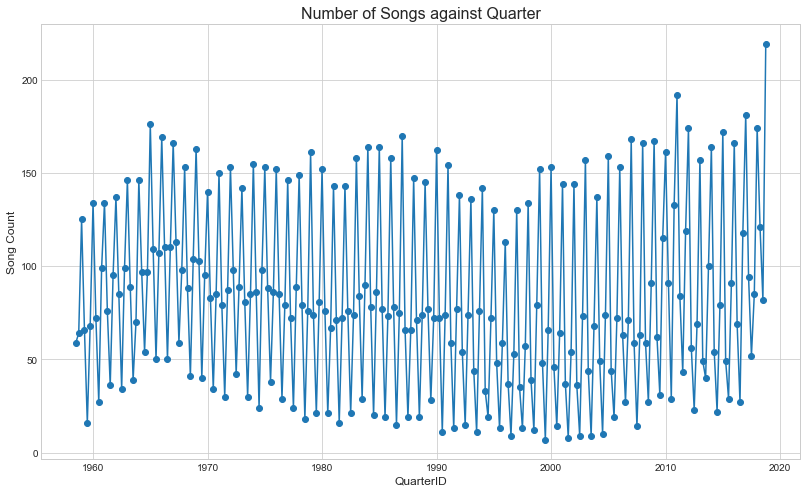

In [134]:
quarter_count_df = Genius_Song.groupby(lambda x: Genius_Song.loc[x, "WeekID"].year + (Genius_Song.loc[x, "WeekID"].quarter - 1) * 0.25).count()["Song"]
plot_Count(quarter_count_df, "Quarter")

#### Group by Half-of-Year

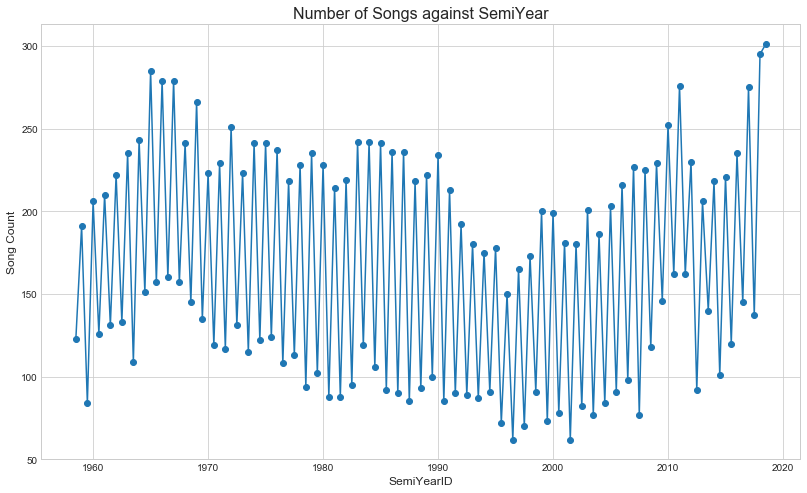

In [136]:
semiYear_count_df = Genius_Song.groupby(lambda x: Genius_Song.loc[x, "WeekID"].year + (Genius_Song.loc[x, "WeekID"].quarter - 1)//2 * 0.5).count()["Song"]
plot_Count(semiYear_count_df, "SemiYear")

#### Group by Year

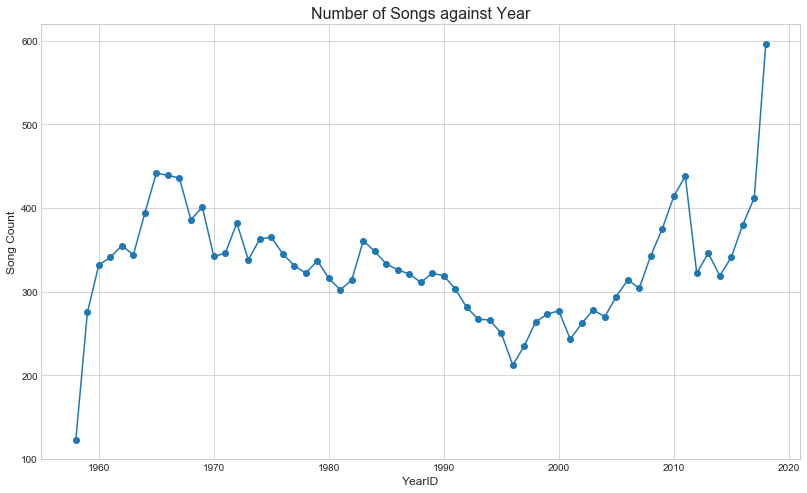

In [137]:
year_count_df = Genius_Song.groupby(lambda x: Genius_Song.loc[x, "WeekID"].year).count()["Song"]
plot_Count(year_count_df, "Year")